# DSCI 572 "lecture" 4

#### Dependencies:

- tensorflow: `pip install tensorflow`
- keras: `pip install keras`

In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
plt.rcParams['font.size'] = 16

In [5]:
%autosave 0

Autosave disabled


Plan:

- Lab 2 recap (5 min)
- True/false questions (10 min)
- Defining a neural network; vocabulary and notation (20 min)
- Activation functions (5 min)
- Break (5 min)
- Deep learing software; Keras (20 min) 
- Parameters & Hyperparameters (10 min)
- Summary, preview of next class (5 min)

## Lab 2 recap / thoughts

- I sense that Lab 2 was Exercise 2 drained a lot of time last week.
- The answer was not exactly as expected, especially for small numbers.
- Question: why is it important to get an exact answer?
- Possible answers:
  1. Marks
  2. Curiosity
- Optimizing marks vs. optimizing the bigger picture.
- Curiosity: usually good, sometimes needs to be reined in or deferred.

## True/False video review questions (10 min)

1. Neural networks can be used for both regression and classification.
2. In general for neural networks, the number of parameters $\geq$ the number of features.
3. Linear regression is a special case of a neural network.
4. Neural networks are non-parametric.

<br><br><br><br><br><br><br><br><br>

## Defining a neural network (20 min; also in video)

We define the function recursively:

$$ x^{(l+1)} = h\left( W^{(l)} x^{(l)} + b^{(l)}\right) $$

where $W^{(l)}$ is a matrix of parameters, $b^{(l)}$ is a vector of parameters. 

So what is $x^{(l)}$?
 * $x^{(0)}$ are the inputs
 * $x^{(L)}$ are the outputs, so we can say $\hat{y}=x^{(L)}$
 * we refer to $L-1$ as the _number of hidden layers_


In [6]:
def example_1_layer_nn_predict(x,W,h): # x is a vector, W is a matrix
    return h(W@x)

x = np.random.rand(5)   # d = 5
W = np.random.rand(2,5) # transforming from 5 dimensions to 2 dimensions
h = lambda x: x**2      # just an example, not a typical choice...

example_1_layer_nn_predict(x,W,h)

array([0.79316262, 4.4612446 ])

Above, the size of the input is 5 and the size of the output is 2.

In [7]:
def example_nn_predict(x,W,h): # x is a vector, W is a _list of matrices_
    for W_l in W:
        x = h(W_l@x)
    return x

x = np.random.rand(5)
W1 = np.random.rand(2,5)
W2 = np.random.rand(1,2)
h = lambda x: x**2
example_nn_predict(x, [W1,W2], h)

array([3.3776461])

Above, the size of the input is 5 and the size of the output is 1. This could now be used for regression, if we could somehow define a loss and find the $W$ matrices that minimize it...


Also: 
 - the $W^{(l)}$ do _not_ need to be square. 
 - the $x^{(l)}$ for $0<l<L$ are "intermediate states"
   - there are called _hidden units_ or _hidden neurons_
   - the _values_ of these units are called _activations_
 - we often refer to the elements of $W$ as "weights" and the elements of $b$ as "biases"
 - we might not apply $h$ at the last layer... more details to come.
 
![](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

In the diagrams above, circles are states and arrows carry weights.

Important note: neural nets map from $\mathbb{R}^d\rightarrow \mathbb{R}^k$ for some arbitrary $d$ and $k$. The outputs do not have to be scalars. We will make use of this later!

#### Vocabulary

- deep learning
- (artificial) neural net(work)
- NN, ANN, CNN
- layers
- units, neurons, activations
- hidden, visible
- activation function, nonlinearity
- ReLU, sigmoid
- backprop(agation)

## Activation functions (5 min)

 - $h$ is called the _activation function_. 
 - Question: why do we need $h$ at all?
 - Answer: if no $h$, then we are composing a bunch of linear functions, which just leaves us with a linear function.
 - Insight: if $h$ is nonlinear, then increasing the number of "layers" increases the complexity of the overall function. 
 
In neural networks, we choose $h$ to be an _elementwise_ nonlinear function. i.e.

$$h(x)\equiv\left[\begin{array}{c}h(x_1)\\h(x_2)\\ \vdots \\ h(x_d)  \end{array}\right]$$

Activation functions tend to be continuous, but are [not always smooth or monotonic](https://arxiv.org/pdf/1710.05941.pdf).

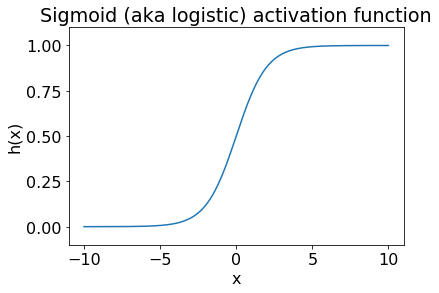

In [8]:
x = np.linspace(-10,10,1000)
h = lambda x: 1/(1+np.exp(-x))
plt.plot(x,h(x))
plt.ylim(-0.1,1.1);
plt.xlabel('x');
plt.ylabel('h(x)');
plt.title("Sigmoid (aka logistic) activation function");

Sometimes people also use the hyperbolic tangent. It's basically the same thing but has a range of $(-1,1)$ instead of $(0,1)$. 

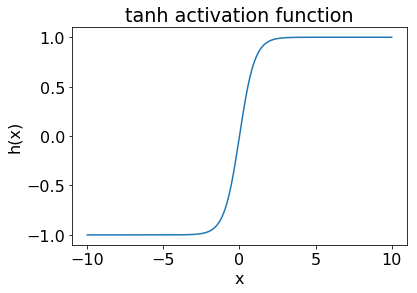

In [9]:
plt.plot(x, np.tanh(x));
plt.xlabel('x');
plt.ylabel('h(x)');
plt.title("tanh activation function");

More recently, people use the ReLU (Rectified Linear Unit)

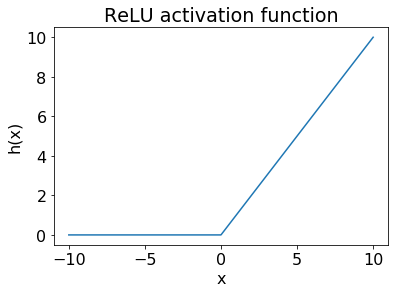

In [10]:
plt.plot(x, np.maximum(0,x));
plt.xlabel('x');
plt.ylabel('h(x)');
plt.title("ReLU activation function");

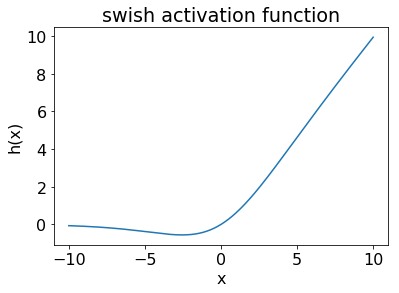

In [11]:
β = 0.5
plt.plot(x, x / (1+np.exp(-β*x)));
plt.xlabel('x');
plt.ylabel('h(x)');
plt.title("swish activation function");

## Break (5 min)

## Deep learning software (20 min)

There's been a lot of software released lately to take care of this for you. Some big players are:

| Name   |  Host language  | Released |  Comments | Stars on GitHub (Jan 2019) |
|--------|-------------|---------------|----------|-----------------|
| [Torch](http://torch.ch) | Lua | 2002 | Used at Facebook | 8k |
| [Theano](http://deeplearning.net/software/theano/) | Python | 2007 | From U. de Montréal, going out of fashion | 9k |
| [Caffe](http://caffe.berkeleyvision.org) | Executable with Python wrapper | 2014 | Designed for CNNs, by UC Berkeley | 27k
| [TensorFlow](https://www.tensorflow.org) | Python | 2015 | Created by Google for both prototyping and production | 118k
| [Keras](https://keras.io) | Python | 2015 | A front-end on top of Theano or TensorFlow | 37k
| [PyTorch](http://pytorch.org) | Python | 2017 | Automatic differentiation through arbitrary code like Autograd | 24k |
| [Caffe 2](https://caffe2.ai/) | Python or C++ | 2017 | Facebook, open source, [_merged with PyTorch last year_](https://caffe2.ai/blog/2018/05/02/Caffe2_PyTorch_1_0.html) | repo archived, 8k

- There are many others of course. See for example this [comparison of deep learning software](https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software).
- From the table above, we can see there have been a lot of new packages released recently.
- We will focus on **Keras** because it's very easy to use. 
  - We'll use the TensorFlow backend but the code works for both backends (that's the beauty of it)
- scikit-learn also has its [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). 
  - These were shown in the lecture video.
  - They have very limited functionality and generally aren't recommended.
  - Even Keras is on the user-friendly-but-less-flexible side.
  - Fun fact: these classes were contributed to scikit-learn by a UBC graduate student.

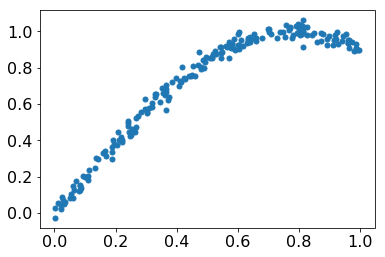

In [12]:
# generate synthetic 1D data
npr.seed(5)
N = 200
X = npr.rand(N,1)
y = np.sin(2*X) + npr.randn(N,1)*0.03

plt.figure()
plt.plot(X,y,'.',markersize=10);

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

# Compile model
# This is where the magic happens!
model.compile(loss='mean_squared_error', optimizer="adam")

# Fit the model
# loss=model.evaluate(X, y,verbose=0)
# print(loss)
model.fit(X, y, epochs=1000, verbose=0)

# evaluate the model
loss=model.evaluate(X, y,verbose=0)
print(loss)

0.001099244374781847


Note: in scikit-learn, we use one line of Python code to set up the model and set the hyperparameters. For example:

```python
model = SVC(C=5, gamma=0.1)
```

In Keras, we use multiple lines of Python code to set up the model. For example:

```python
model = Sequential()
model.add(Dense(10, input_dim=1, activation='tanh', kernel_initializer='lecun_uniform',))
model.add(Dense(10, activation='tanh', kernel_initializer='lecun_uniform',))
model.add(Dense(1, activation='linear', kernel_initializer='lecun_uniform',))
```

- This design decision just makes the code more human-readable.
- One line of code per layer of the network.
- But there's nothing fundamental about it, one could also put the architecture/hypers on one line, in a file, etc.

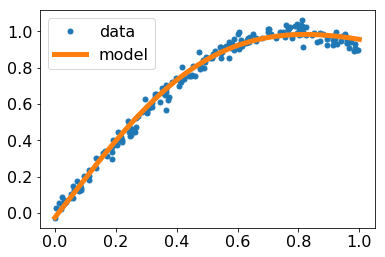

In [14]:
plt.plot(X,y,'.',markersize=10,label="data")
grid = np.linspace(0,1,1000)[:,None]
plt.plot(grid, model.predict(grid),linewidth=5,label="model")
plt.legend();
# list(map(lambda x: x.shape, NN.W))

(Repeat from video) we can also look at regression surfaces with random weights:

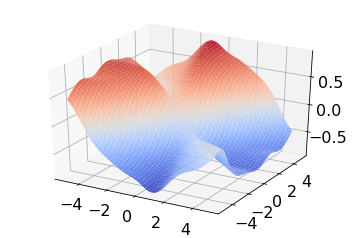

In [18]:
# random weights
model = Sequential()
model.add(Dense(50, input_dim=2, activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='lecun_uniform',))
model.compile(loss='mean_squared_error', optimizer='sgd')

fig = plt.figure()
ax = fig.gca(projection='3d')

n = 100
X = np.linspace(-5, 5, n)
Y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(X, Y)

inputs = np.append(X.flatten()[:,None], Y.flatten()[:,None],axis=1)
outputs = model.predict(inputs)
Z = np.reshape(outputs, [n,n])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

## Parameters and hyperparameters (20 min)


In [33]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='tanh', kernel_initializer='lecun_uniform',))
model.add(Dense(5, activation='tanh', kernel_initializer='lecun_uniform',))
model.add(Dense(1, activation='linear', kernel_initializer='lecun_uniform',))

In [34]:
# if you install graphviz and pydot, the following will "draw" the network architecture
# however I find it more confusing than helpful
# from keras.utils.vis_utils import model_to_dot
# import graphviz
# graphviz.Source(model_to_dot(model, show_shapes=True))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Below: we can inspect the weights themselves:

In [36]:
for W in model.get_weights():
    print(W.shape)

(1, 10)
(10,)
(10, 5)
(5,)
(5, 1)
(1,)


WARNING: Keras uses the opposite notation that we use. Here, if the shape of $W$ is $1\times 10$ that means transforming from $1$ number to $10$ numbers. In our notation, it's the other way around: if $W$ is $1 \times 10$ that means transforming from $10$ numbers to $1$ number. You'll see both notations out in the wild.

- The Keras notation is more intuitive in that the shapres are $(d_\text{in},d_\text{out})$ rather than $(d_\text{out},d_\text{in}$).
- Our notation is more convenient because we can write $Wx$ instead of $W^Tx$ everywhere.
  - And this also makes it consistent with notation from other courses, the lecture videos, etc.

#### Number of parameters

- There's no agreed upon convention for the number of layers.
- Let's say, for our purposes, that $x^{(0)}$ is an input and $x^{(L)}$ is an output, which means we have $L+1$ total layers and $L-1$ hidden layers.
- Let $d_0,d_1,d_2,\ldots,d_L$ be the dimensionality of the layers. 
 - So $d_0=d$ (input layer) and $d_L=k$ (output layer).
 - We get to pick the dimensionality of each of the hidden layers, i.e. $d_1,\ldots,d_{L-1}$; these are hyperparameters. 

#### In general, how many parameters do we have?

- Weights: $d_0d_1 + d_1d_2 + \ldots + d_{L-1}d_L$
- Biases: $d_1 + d_2 + \ldots + d_L$
- Total: 

$$(d_0+1)d_1 + (d_1+1)d_2 + \ldots + (d_{L-1}+1)d_L$$

- Again, this is just bookkeeping. But it's important to realize that  **this is potentially a lot of parameters!!**
  - Example: in the 3Blue1Brown video, we had 13,002 parameters.
  - Example: let $L=3,d_0=d_1=d_2=d_3=1000$. Then we have millions of parameters! 
- Sometimes we have billions. 
- So we have a million-dimensional non-convex optimization problem. That's hard. More on this next class.

In [30]:
model = Sequential()
model.add(Dense(1000, input_dim=1000)) # d0=1000, d1=1000
model.add(Dense(1000)) # d2=1000
model.add(Dense(1000)) # d3=1000
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              1001000   
Total params: 3,003,000
Trainable params: 3,003,000
Non-trainable params: 0
_________________________________________________________________


#### Hyperparameters

- Neural networks have potentially a lot of hyperparameters.
- The first choice is the number of layers. Then...
- Each layer can have its own set of hyperparameters (or this could be the same across layers), such as
  - Dimensionality
  - Activation function
  - Regularization; more on this next class
  - ...
- Then we also have the optimization hyperparameters (more on this next class)
  - Initialization
  - Learning rate(s)
  - ...
- As usual, the hyperparameters control the fundamental tradeoff of ML
  - With no hidden layers, we have linear/logistic regression.
  - More features --> more weights --> lower training error. 
  - Now we can expand the model complexity by adding layers, without collecting more features.

## Wrap-up (5 min)

#### Summary:

- "Neural networks" just refers to a class of functions.
- These functions are weird because they're defined recursively.
  - So you can think of them having an intermediate ("hidden") state.
- Each layer is followed by an activation function, that's applied elementwise to each "unit".
- A lot of deep learning software has emerged recently; we'll use Keras.
- Compared to other methods we've studied, neural networks have a lot of parameters and a lot of hyperparameters.

#### Preview of next class:

- Today we talked about what a neural network is.
- Next class we'll talk about how to train it. 
- It's a bit more complicated than just "apply gradient descent" because:
  - The loss is non-convex.
  - The number of parameters is potentially huge (searching a very high-dimensional space).
  - The number of training examples often needs to be huge (computation is slow).
- Tomorrow in DSCI 573 you will (hopefully) be discussing regularization, which we'll be using in this class right away.
  - We need methods for combatting overfitting because the number of parameters can get so large. 